# Data Processing

This notebook contains the data processing phase of the project. The images saved as .jpg files in the data/0001_img_data directory are read and processed into a format usable by the models. The aim of this notebook is to prepare a clean version of the data to be exported into the repository. This data will then be callable by the models in their respective notebooks.

### Step 1: Preprocessing and Cleaning

First, the images must be read into python. In order to do this, a function; read_process_imgs, was created (see the functions folder for documentation) that takes in a simple dataframe of image names and reads them using the cv2 library. 

In [1]:
# importing necessary packages and libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import seaborn as sns
%matplotlib inline

In [2]:
# calling the species information file and creating list of species names
species_df = pd.read_csv('../data/0003_general/species_list_final.csv')
species_as_list = species_df['common_name'].tolist()

In [3]:
# replacing whitespace with underscores
species_list=[]
for i in species_as_list:
    species_list.append(i.replace(" ", "_"))

In the next cell, a function is used to compile all the images in the subdirectories by species name, based on the names in the species list. The output is a simple dataframe for each of the species. The resulting dataframes are then merged together in order to be run through the read_process_imgs function (see functions folder for documentation).

In [4]:
img_base_path = '../data/0001_img_data/'

In [5]:
# importing the compile_imgs_to_df function
from functions.compile_imgs_to_df import compile_imgs_to_df

In [6]:
# creating list of dataframes containing the dataframe for each species
df_list = []

for species in species_list:
    df = compile_imgs_to_df(species,img_base_path)
    df_list.append(df)

In [7]:
# combining into single dataframe
data_df = pd.concat(df_list)

In [8]:
data_df.head(3)

,image,class
0,../data/0001_img_data/amethyst_deceiver/amethy...,amethyst_deceiver
1,../data/0001_img_data/amethyst_deceiver/amethy...,amethyst_deceiver
2,../data/0001_img_data/amethyst_deceiver/amethy...,amethyst_deceiver


In [9]:
# importing the read_process_imgs function
from functions.read_process_imgs import read_process_imgs

Using TensorFlow backend.


The function is then run. This outputs a numpy array for the X data (the image matrices) and the y data (the class/species, one-hot encoded), as well as a list of the species names for visualisation purposes. The image size is specified as 200x200. Note that this step may take some time to run, depending on the number of images and the specified image size.

In [10]:
%%time
X, y, y_list = read_process_imgs(data_df,200,200)

CPU times: user 1min 12s, sys: 10.1 s, total: 1min 22s
Wall time: 1min 31s


### Step 2: Data Inspection

We now have two numpy arrays in the correct format for use in the model. The X array describes the image dimensions and RGB layer for each of the images. The y array consists of a one-hot encoded class label for each of the images.

In [11]:
# inspecting output array shape
print('X shape:',X.shape)
print('y shape:',y.shape)

X shape: (10135, 200, 200, 3)
y shape: (10135, 20)


We can now prepare some visualisations in order to check that the data has loaded appropriately. First, a plot to display the first four images, and then a plot to check the number of images for each species in the list.

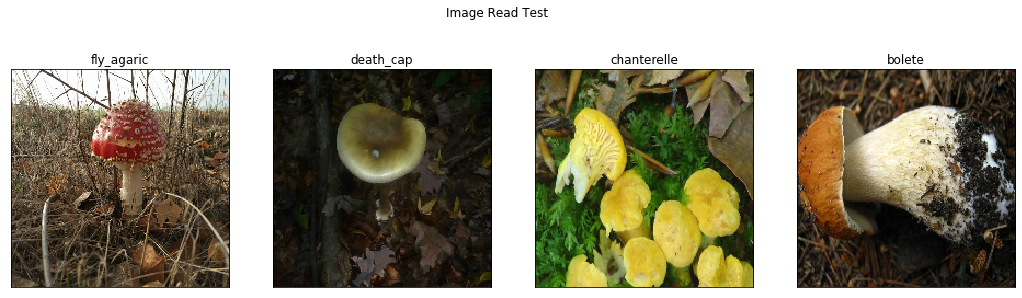

In [12]:
# displaying the first 4 images
fig, axs = plt.subplots(1,4,figsize=(18,5))
fig.suptitle('Image Read Test')

for i in range(4):
    axs[i].imshow(X[i])
    axs[i].set_title(y_list[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])

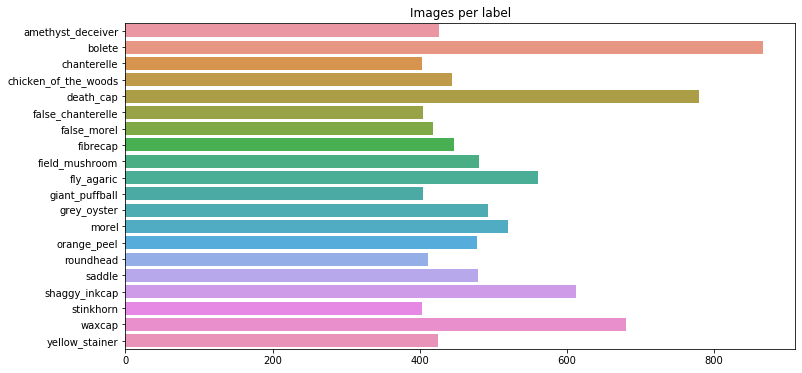

In [13]:
# checking number of images per class
plt.figure(figsize=(12,6))
y_plot, x_plot = np.unique(np.array(y_list), return_counts=True)
sns.barplot(x_plot,y_plot)
plt.title('Images per label')
plt.show()

### Step 3: Data Preparation

Now that we have an adequate dataset in numpy array format, we can prepare the data for use in the models. In order for the models to be run and validated consistently, the dataset is split into training, validation, and testing sets at this point, and the resulting subsets are saved into the repository to be called by the models in their respective notebooks.

In [14]:
# importing the necessary libraries
from sklearn.model_selection import train_test_split

In [15]:
# performing the train/validation/test split
X_train, X_tv, y_train, y_tv = train_test_split(X, y, test_size=0.2, stratify=y, random_state=16)
X_val, X_test, y_val, y_test = train_test_split(X_tv, y_tv, test_size=0.6, stratify=y_tv, random_state=17)

In [16]:
# sense-checking the subset shapes
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_val shape:',X_val.shape)
print('y_val shape:',y_val.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (8108, 200, 200, 3)
y_train shape: (8108, 20)
X_val shape: (810, 200, 200, 3)
y_val shape: (810, 20)
X_test shape: (1217, 200, 200, 3)
y_test shape: (1217, 20)


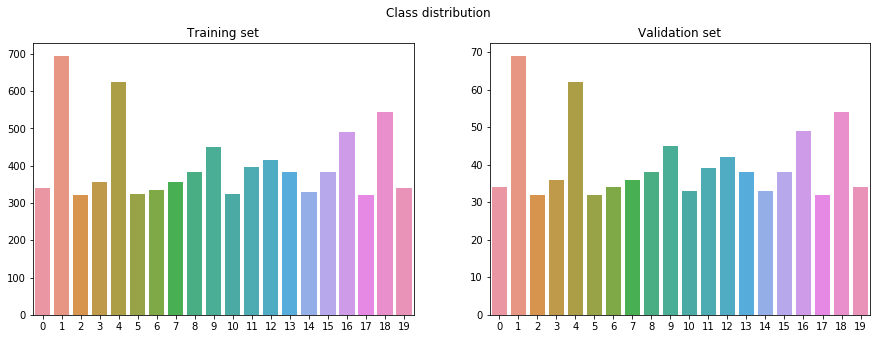

In [17]:
train_class, train_count = np.unique(np.argmax(y_train, axis=1), return_counts=True)
val_class, val_count = np.unique(np.argmax(y_val, axis=1), return_counts=True)

fig, axs = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Class distribution")

sns.barplot(train_class,train_count,ax=axs[0])
axs[0].set_title('Training set')
sns.barplot(val_class,val_count,ax=axs[1])
axs[1].set_title('Validation set')
plt.show()

The data subsets are ready, and are exported into training and testing folders (within the data/0002_array_data folder) in the cell below.

In [18]:
np.save('../data/0002_array_data/train_data/X_train_data.npy', X_train)
print('X_train saved under ../data/0002_array_data/train_data/X_train_data.npy!')
np.save('../data/0002_array_data/train_data/y_train_data.npy', y_train)
print('y_train saved under ../data/0002_array_data/train_data/y_train_data.npy!')
np.save('../data/0002_array_data/train_data/X_val_data.npy', X_val)
print('X_val saved under ../data/0002_array_data/train_data/X_val_data.npy!')
np.save('../data/0002_array_data/train_data/y_val_data.npy', y_val)
print('y_val saved under ../data/0002_array_data/train_data/y_val_data.npy!')
np.save('../data/0002_array_data/test_data/X_test_data.npy', X_test)
print('X_test saved under ../data/0002_array_data/test_data/X_test_data.npy!')
np.save('../data/0002_array_data/test_data/y_test_data.npy', y_test)
print('y_test saved under ../data/0002_array_data/test_data/y_test_data.npy!')

X_train saved under ../data/0002_array_data/train_data/X_train_data.npy!
y_train saved under ../data/0002_array_data/train_data/y_train_data.npy!
X_val saved under ../data/0002_array_data/train_data/X_val_data.npy!
y_val saved under ../data/0002_array_data/train_data/y_val_data.npy!
X_test saved under ../data/0002_array_data/test_data/X_test_data.npy!
y_test saved under ../data/0002_array_data/test_data/y_test_data.npy!
